## Análisis Retiro 2019

In [53]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import datetime

%matplotlib inline

#pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (7, 5)

#### Importo la Dataset de la Entidad

In [55]:
#Importo la base
mainpath = "C:/Users/eangenello/Desktop/TECNICA/Python/input"
filename = "CREDICOOP"
fullpath = mainpath + "/" + filename + ".xlsx"

data=pd.read_excel(fullpath, sheet_name = 'Copia')

data.head()

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,Ajuste,Anses,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.
0,20013040398,"BERTRAN, JUAN",399,1072003,RVP,PF,326.25,326.25,"28,259.24",TT,SI,15550159670,1,27029366638,C,70.00,F,10061936,nan
1,20041011549,"CREMIEUX, ANGEL",3193,1112008,RVP,PF,332.82,332.82,"52,441.11",TT,SI,15592583980,1,27062193005,C,70.00,F,19101949,nan
2,20041100592,"MIZRACH, DAVY ARNOLDO",1486,1052006,RVP,J,"1,021.30","1,021.30","108,050.27",TT,SI,15012575090,1,20041100592,T,100.00,M,23061933,nan
3,20041270056,"JULIANEZ, CESAR ERNESTO",111,1082002,RVP,J,263.17,263.17,"29,754.31",TT,SI,15085621100,1,20041270056,T,100.00,M,23071933,nan
4,20041282429,"COLMAN, ATAHUALPA ORLANDO",1606,1082006,RVP,J,237.23,237.23,"23,827.85",TT,SI,15012479390,1,20041282429,T,100.00,M,15011934,nan


#### Limpio la Base

In [56]:
# Controlo el tipo de dato de las variables
data.dtypes

Ciul Causante           int64
Apellido               object
Nombres                 int64
Nro. Póliza             int64
Inicio de Vigencia     object
Tipo de Renta          object
Prestacion            float64
Renta Liq.            float64
Renta Gar.            float64
Reserva                object
Ajuste                 object
Anses                   int64
Nro. Beneficio          int64
Nro. Beneficiarios      int64
Cuil Beneficiario      object
Tipo Beneficiario     float64
% Beneficio            object
Sexo                    int64
Fecha de Nac.         float64
dtype: object

In [57]:
# Transformo el tipo de dato
data['Ciul Causante'] = data['Ciul Causante'].astype(object)
data['Cuil Beneficiario'] = data['Cuil Beneficiario'].astype(object)
data['Nro. Póliza'] = data['Nro. Póliza'].astype(object)
data['Nro. Beneficio'] = data['Nro. Beneficio'].astype(object)
#data['Fecha de Nac.'] = pd.to_datetime(data['Fecha de Nac.'])
#data['Inicio de Vigencia'] = pd.to_datetime(data['Inicio de Vigencia'])

In [58]:
data.tail()

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,Ajuste,Anses,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.
3804,27936006936,"BIANCO, CAMILA",2508,1122007,RVP,I,"2,166.64","2,166.64","346,733.06",TT,SI,15087211800,1,27936006936,T,100.00,F,23121947,nan
3805,27936970465,"FELLI, MARIA CLARA",1951,1012007,RVP,J,938.15,938.15,"117,079.59",TT,SI,15015240610,1,27936970465,T,100.00,F,1011946,nan
3806,27937233235,"VELAZQUEZ ORTIGOZA, BENJAMINA",2491,1112007,RVP,J,216.14,216.14,"28,021.31",TT,SI,15030513000,1,27937233235,T,100.00,F,31031945,nan
3807,27937742296,"RODRIGUEZ GARVIZU, MACEDONIA",451,1092003,RVP,PF,121.80,121.80,"73,768.83",TT,SI,15587651883,2,20434452504,H,20.00,M,20092001,nan
3808,27937742296,"RODRIGUEZ GARVIZU, MACEDONIA",451,1092003,RVP,PF,304.50,304.50,"73,768.83",TT,SI,15587651880,2,20929393237,C,50.00,M,10111958,nan


#### Armo la base sin registros duplicados

In [59]:
duplicados = data['Nro. Póliza'].value_counts()
duplicados = pd.DataFrame(duplicados)
duplicados = duplicados[duplicados['Nro. Póliza'] >1]

duplicados

,Nro. Póliza
1082004,122
1032008,91
1042008,90
1012008,83
1112006,75
1122007,73
1022008,73
1102006,72
1092007,72
1082006,70


In [60]:
#Copio los datos con el que voy a agrupar
data1 = data.copy() 

#Sumo las rentas liquidadas
data1 =data1.groupby(['Nro. Póliza'], as_index=False)['Renta Liq.','Nro. Beneficiarios'].sum() 
#data1 =data1.groupby(['Nro. Póliza'], as_index=False)['Renta Liq.'].sum() 

# Modifico el typo de dato para que me deje hacer el join después
data1['Nro. Póliza'] = data['Nro. Póliza'].astype(object) 

In [61]:
#Copio los datos para hacer el join
data2 = data.copy() 

# Elimino Renta liquidada para que no se duplique
data2 = data2.drop(['Renta Liq.','Nro. Beneficiarios'], axis=1) 
#data2 = data2.drop(['Renta Liq.'], axis=1) 

# Elimino los registros duplicados
data2 = data2.drop_duplicates('Nro. Póliza', keep='last') 

In [62]:
#Junto ambos datasets
data_sdup= data1.merge(data2, how='inner', on='Nro. Póliza') 

In [10]:
data_sdup.head()

,Nro. Póliza,Renta Liq.,Nro. Beneficiarios,Ciul Causante,Apellido,Nombres,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Gar.,Reserva,Ajuste,Anses,Nro. Beneficio,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.
0,100001,"2,629.10",1,20013901407,Castaño,Nicolas Antonio,1997-06-01,ART,PF,"2,629.10","154,811.60",TT,NO,NaN,27040682932,C,1.00,F,1930-02-16
1,100002,"2,341.04",2,20044290430,Petersen,Adolfo Felipe,1997-12-01,ART,PF,"2,341.04","311,379.04",TT,NO,NaN,27055955803,C,0.71,F,1947-03-23
2,100003,556.23,3,20167328130,Roggero,Rodolfo Fabian,1998-01-01,ART,PF,556.23,"142,596.97",TT,NO,NaN,27244482843,C,0.56,F,1975-03-04
3,100005,430.18,9,20126834897,Belotto,Miguel Angel,1998-05-01,ART,PF,430.18,"84,652.62",TT,NO,NaN,27134719317,C,0.24,F,1959-09-16
4,100007,551.99,3,20936795618,Parada Parra,Carlos Del Carmen,1999-10-01,ART,PF,551.99,"126,039.97",TT,NO,NaN,27180557860,C,0.56,F,1967-02-24


---

### Creación variables

#### * Edad aproximada del beneficiario

In [11]:
# Creo la variable 'HOY'
data['hoy'] = datetime.date.today()

# Modifico el tipo de dato de las variables con fecha
data['hoy'] = pd.DataFrame(data['hoy'], dtype="datetime64[ns]") 
data['Fecha de Nac.'] = pd.DataFrame(data['Fecha de Nac.'], dtype="datetime64[ns]")

# Calculo la diferencia entre dos fechas
data['dif']= (data['hoy']-data['Fecha de Nac.']) / pd.Timedelta('1 day')

# Creo la variable Edad_Beneficiario
data['edad_beneficiario'] = (data['dif'] / 365)

# Redondeo hacia arriba
data['edad_beneficiario'] = data['edad_beneficiario'].apply(np.ceil)

# Elimimo la variable dif
data = data.drop('dif', axis=1)


In [12]:
pd.isnull(data['edad_beneficiario']).values.ravel().sum()

0

In [13]:
data.head()

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,...,Anses,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,hoy,edad_beneficiario
0,20013901407,Castaño,Nicolas Antonio,100001,1997-06-01,ART,PF,"2,629.10","2,629.10","154,811.60",...,NO,NaN,1,27040682932,C,1.00,F,1930-02-16,2019-06-05,90.00
1,20044290430,Petersen,Adolfo Felipe,100002,1997-12-01,ART,PF,"2,341.04","2,341.04","311,379.04",...,NO,NaN,2,27055955803,C,0.71,F,1947-03-23,2019-06-05,73.00
2,20167328130,Roggero,Rodolfo Fabian,100003,1998-01-01,ART,PF,556.23,556.23,"142,596.97",...,NO,NaN,3,27244482843,C,0.56,F,1975-03-04,2019-06-05,45.00
3,20126834897,Belotto,Miguel Angel,100005,1998-05-01,ART,PF,430.18,430.18,"84,652.62",...,NO,NaN,9,27134719317,C,0.24,F,1959-09-16,2019-06-05,60.00
4,20936795618,Parada Parra,Carlos Del Carmen,100007,1999-10-01,ART,PF,551.99,551.99,"126,039.97",...,NO,NaN,3,27180557860,C,0.56,F,1967-02-24,2019-06-05,53.00


#### * Años de vigencia

In [14]:
# Modifico el tipo de dato
data['Inicio de Vigencia'] = pd.DataFrame(data['Inicio de Vigencia'], dtype="datetime64[ns]")

# Calculo la diferencia entre dos fechas
data['dif']= (data['hoy']-data['Inicio de Vigencia']) / pd.Timedelta('1 day')

# Creo la variable Edad_Beneficiario
data['años_vigencia'] = round(data['dif'] / 365)

# Elimimo la variable dif
data = data.drop(['dif', 'hoy'], axis=1)

In [15]:
pd.isnull(data['años_vigencia']).values.ravel().sum()

0

In [16]:
data.head()

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,...,Anses,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,edad_beneficiario,años_vigencia
0,20013901407,Castaño,Nicolas Antonio,100001,1997-06-01,ART,PF,"2,629.10","2,629.10","154,811.60",...,NO,NaN,1,27040682932,C,1.00,F,1930-02-16,90.00,22.00
1,20044290430,Petersen,Adolfo Felipe,100002,1997-12-01,ART,PF,"2,341.04","2,341.04","311,379.04",...,NO,NaN,2,27055955803,C,0.71,F,1947-03-23,73.00,22.00
2,20167328130,Roggero,Rodolfo Fabian,100003,1998-01-01,ART,PF,556.23,556.23,"142,596.97",...,NO,NaN,3,27244482843,C,0.56,F,1975-03-04,45.00,21.00
3,20126834897,Belotto,Miguel Angel,100005,1998-05-01,ART,PF,430.18,430.18,"84,652.62",...,NO,NaN,9,27134719317,C,0.24,F,1959-09-16,60.00,21.00
4,20936795618,Parada Parra,Carlos Del Carmen,100007,1999-10-01,ART,PF,551.99,551.99,"126,039.97",...,NO,NaN,3,27180557860,C,0.56,F,1967-02-24,53.00,20.00


#### * Brecha entre Renta Liquidada y Renta Garantizada

In [17]:
data_sdup['Brecha_rentas'] = data_sdup['Renta Liq.'] - data_sdup['Renta Gar.']
#data['Brecha_rentas'] = data['Renta Liq.'] - data['Renta Gar.']

#### * Reserva en años

In [18]:
data_sdup['Reserva_años']= round((data_sdup['Reserva'] / data_sdup['Renta Liq.']) / 12)
#data['Reserva_años']= round((data['Reserva'] / data['Renta Liq.']) / 12)

---

### Variábles numéricas

In [19]:
describe = data_sdup.describe()
#describe = data.describe()

describe

,Renta Liq.,Nro. Beneficiarios,Renta Gar.,Reserva,% Beneficio,Brecha_rentas,Reserva_años
count,"6,365.00","6,365.00","6,365.00","6,365.00","6,365.00","6,365.00","6,365.00"
mean,"2,055.56",2.82,"1,428.04","344,577.26",0.66,627.51,49.16
std,"2,070.15",3.89,"1,452.23","360,793.23",0.28,"2,517.86",590.41
min,0.25,1.00,0.10,57.04,0.12,"-21,911.05",0.00
25%,849.80,1.00,600.73,"129,918.68",0.70,-448.98,6.00
50%,"1,442.66",2.00,"1,006.82","239,604.32",0.70,359.07,14.00
75%,"2,575.41",3.00,"1,766.09","434,744.59",1.00,"1,457.07",31.00
max,"30,014.73",81.00,"22,773.09","4,824,963.41",1.00,"29,147.95","28,797.00"


#### Renta Liquidada

In [20]:
#dist_ren_liq = data.pivot_table('Renta Liq.', ['Tipo de Renta','Prestacion'], aggfunc=('min', 'max', 'mean'))
dist_ren_liq = data_sdup.pivot_table('Renta Liq.', ['Tipo de Renta','Prestacion'], aggfunc=('min', 'max', 'mean'))

dist_ren_liq

max     mean   min
Tipo de Renta Prestacion                         
ART           I          11,156.68 1,964.49 17.50
              PF         30,014.73 1,972.95  1.39
RVP           I          21,547.90 2,124.12 36.06
              J          25,583.92 2,292.30  0.25
              PF         29,593.66 2,021.11  3.03

In [21]:
#anses_ren_liq = data.pivot_table('Renta Liq.', ['Anses'], aggfunc=('min', 'max', 'mean'))
anses_ren_liq = data_sdup.pivot_table('Renta Liq.', ['Anses'], aggfunc=('min', 'max', 'mean'))

anses_ren_liq

,max,mean,min
Anses,,,
NO,"30,014.73","2,034.77",1.39
SI,"25,583.92","2,064.81",0.25


#### Renta Garantizada

In [22]:
#dist_ren_gar = data.pivot_table('Renta Gar.', ['Tipo de Renta','Prestacion'], aggfunc=('min', 'max', 'mean'))
dist_ren_gar = data_sdup.pivot_table('Renta Gar.', ['Tipo de Renta','Prestacion'], aggfunc=('min', 'max', 'mean'))

dist_ren_gar

max     mean    min
Tipo de Renta Prestacion                          
ART           I           7,143.35 1,523.85 146.41
              PF          5,305.11 1,294.19   7.94
RVP           I          22,773.09 3,664.85 287.89
              J          18,984.12   970.97  33.10
              PF         17,721.23 1,400.96   0.10

In [23]:
#anses_ren_gar = data.pivot_table('Renta Gar.', ['Anses'], aggfunc=('min', 'max', 'mean'))
anses_ren_gar = data_sdup.pivot_table('Renta Gar.', ['Anses'], aggfunc=('min', 'max', 'mean'))

anses_ren_gar

,max,mean,min
Anses,,,
NO,"12,506.21","1,455.77",0.10
SI,"22,773.09","1,415.70",1.14


#### % de Beneficio por tipo de Presentación

In [24]:
data['% Beneficio1'] = pd.Series(["{0:.2f}%".format(val * 100) for val in data['% Beneficio']], index = data.index)

dist_porc_ben = data.pivot_table( 'Nro. Beneficiarios', ['Prestacion','% Beneficio1'], aggfunc=('count'))

dist_porc_ben

Nro. Beneficiarios
Prestacion % Beneficio1                    
I          100.00%                      918
           20.00%                         1
           35.00%                         4
           50.00%                         1
           70.00%                         7
J          100.00%                     1090
           70.00%                         3
PF         10.53%                        14
           100.00%                       42
           11.76%                        24
           13.33%                         5
           15.38%                        80
           18.18%                       148
           19.23%                         4
           20.00%                       829
           22.73%                         2
           23.81%                         2
           25.00%                        24
           26.32%                         2
           29.41%                         4
           33.33%                        16
           35.00%                        74
           35.71%                         2
           38.46%                        20
           45.00%                        34
           45.45%                        63
           50.00%                       777
           55.56%                         7
           70.00%                      3390
           71.43%                         8
           9.52%                          8

---

---

### CONTROLES

* **Ajuste = CER y DOLAR**

&nbsp; *Fecha Máxima*

In [25]:
# Se espera que sea antes del 2008

aj =  data[(data['Ajuste'] == 'CER') | (data['Ajuste'] == 'DOLAR')]
aj['Inicio de Vigencia'].max()

NaT

* **Tipo de Renta = Renta Vitalicia Previsional (RVP)**
* **Prestacion = Jubilación (J)**
* **Anses = SI**

&nbsp; *Edad Mínima*

In [26]:
# Se espera que al menos tenga 60 años

tr =  data[(data['Tipo de Renta'] == 'RVP') & (data['Prestacion'] == 'J') & (data['Anses'] == 'SI')]
tr['edad_beneficiario'].min()
#ftr = tr[tr['edad_beneficiario'] < 60] 
#ftr

63.0

* **Tipo de Renta = ART**
* **Prestacion = Invalidez (I)**
* **Anses = NO**

&nbsp; *Edad Mínima*

In [27]:
# Se espera que sea mayor de edad

trp =  data[(data['Tipo de Renta'] =='ART') & (data['Prestacion'] == 'I') & (data['Anses'] == 'NO')]
trp['edad_beneficiario'].min()
#trp = trp[trp['edad_beneficiario'] < 18] 
#trp

30.0

* **Anses = SI**
* **Menor que 60 años**

&nbsp; *Tipo de Renta y Prestacion*

In [28]:
# Se espera que el tipo de renta sea por Fallecimiento o Invalidez

am = data[(data['Anses'] == 'SI') & (data['edad_beneficiario'] < 60) ]
am.pivot_table('Nro. Póliza', ['Tipo de Renta','Prestacion'], aggfunc=('count'))

Nro. Póliza
Tipo de Renta Prestacion             
ART           I                     9
              PF                  170
RVP           I                    59
              PF                 1250

* **Menor de Edad**

&nbsp; *Tipo de Prestacion*

In [29]:
# Se espera que sea por Fallecimiento

me = data[(data['edad_beneficiario'] < 18) ]
me.pivot_table('Nro. Póliza', ['Prestacion','Tipo de Renta'], aggfunc=('count'))

Nro. Póliza
Prestacion Tipo de Renta             
PF         ART                    236
           RVP                    259

---

#### Renta Liquidada < 1.000

In [30]:
# Creo un subset con cuya renta liquidada sea menor a 1000

renta_mmil = data_sdup[(data_sdup['Renta Liq.']<1000)]
#renta_mmil = data[(data['Renta Liq.']<1000)]

renta_mmil

,Nro. Póliza,Renta Liq.,Nro. Beneficiarios,Ciul Causante,Apellido,Nombres,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Gar.,...,Ajuste,Anses,Nro. Beneficio,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,Brecha_rentas,Reserva_años
2,100003,556.23,3,20167328130,Roggero,Rodolfo Fabian,1998-01-01,ART,PF,556.23,...,TT,NO,NaN,27244482843,C,0.56,F,1975-03-04,0.00,21.00
3,100005,430.18,9,20126834897,Belotto,Miguel Angel,1998-05-01,ART,PF,430.18,...,TT,NO,NaN,27134719317,C,0.24,F,1959-09-16,0.00,16.00
4,100007,551.99,3,20936795618,Parada Parra,Carlos Del Carmen,1999-10-01,ART,PF,551.99,...,TT,NO,NaN,27180557860,C,0.56,F,1967-02-24,0.00,19.00
7,100012,792.36,1,20242491417,Sandoval,Diego Ramon,2001-09-01,ART,PF,792.36,...,TT,NO,NaN,27258163481,C,1.00,F,1977-02-06,0.00,22.00
9,100014,728.17,4,20176106647,Campos,Gustavo Alberto,2002-12-01,ART,PF,728.17,...,TT,NO,NaN,27406512679,H,0.20,F,1997-08-06,0.00,18.00
10,100014,944.17,2,20176106647,Campos,Gustavo Alberto,2002-12-01,ART,PF,728.17,...,TT,NO,NaN,27406512679,H,0.20,F,1997-08-06,216.00,14.00
15,100019,458.02,1,20075436409,Galarza,Ramon,2004-05-01,ART,PF,"1,107.68",...,TT,NO,NaN,20236900232,H,0.20,M,1973-11-27,-649.66,40.00
16,100020,604.56,2,23236592499,Matus,Carlos Angel,2004-06-01,ART,I,"1,239.08",...,TT,NO,NaN,23236592499,T,1.00,M,1974-04-17,-634.52,36.00
20,100024,710.99,1,20290711143,Cabrera,Jorge Daniel,2004-12-01,ART,I,"2,409.95",...,TT,NO,NaN,20290711143,T,1.00,M,1981-11-27,"-1,698.96",67.00
30,100040,687.63,1,27269642209,Devoto,Griselda Noemi,2006-04-01,ART,I,"1,202.31",...,TT,NO,NaN,27269642209,T,1.00,F,1978-11-06,-514.68,36.00


In [31]:
# % de datos respecto al total

a= renta_mmil['Nro. Póliza'].count()
b= data_sdup['Nro. Póliza'].count()
#b= data['Nro. Póliza'].count()

print ('Cantidad:', a, '\n' , '% del total:', a/b)

Cantidad: 2061 
 % del total: 0.3238020424194815


In [32]:
# Evaluo los datos

renta_mmil.describe()

,Renta Liq.,Nro. Beneficiarios,Renta Gar.,Reserva,% Beneficio,Brecha_rentas,Reserva_años
count,"2,061.00","2,061.00","2,061.00","2,061.00","2,061.00","2,061.00","2,061.00"
mean,627.62,2.50,"1,398.34","345,830.32",0.65,-770.73,120.95
std,234.63,3.02,"1,454.88","377,584.95",0.28,"1,470.19","1,033.69"
min,0.25,1.00,1.01,291.09,0.12,"-21,911.05",0.00
25%,438.14,1.00,593.08,"129,227.84",0.50,"-1,103.29",17.00
50%,649.44,2.00,984.06,"242,080.73",0.70,-384.84,34.00
75%,831.49,2.00,"1,732.16","437,670.33",0.70,44.65,67.00
max,999.48,45.00,"22,773.09","4,824,963.41",1.00,912.23,"28,797.00"


In [33]:
# Distribución de los datos respecto al tipo de Renta y Presentación
a = renta_mmil.pivot_table('Nro. Beneficiarios', ['Tipo de Renta','Prestacion'], aggfunc=('count'))
#a['Frec Rel'] = a['Nro. Beneficiarios'] / data_sdup['Nro. Póliza'].count()
a['Frec Rel'] = a['Nro. Beneficiarios'] / data['Nro. Póliza'].count()
a

Nro. Beneficiarios  Frec Rel
Tipo de Renta Prestacion                              
ART           I                          126      0.02
              PF                         360      0.05
RVP           I                           87      0.01
              J                          279      0.04
              PF                        1209      0.16

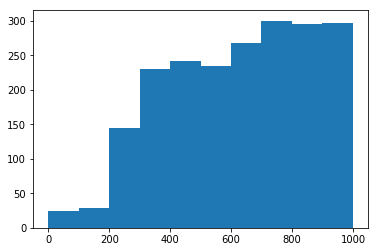

In [34]:
# Grafico distribución de los datos
hist, bin_edges = np.histogram(renta_mmil['Renta Liq.'], 10)
plt.hist(renta_mmil['Renta Liq.'], bins=bin_edges)
plt.show()

#### Brecha de rentas: Renta Liq. < Renta Gar.	

In [35]:
fbr= data_sdup[(data_sdup['Brecha_rentas'] < -100)]
#fbr= data[(data['Brecha_rentas'] < -100)]
fbr

,Nro. Póliza,Renta Liq.,Nro. Beneficiarios,Ciul Causante,Apellido,Nombres,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Gar.,...,Ajuste,Anses,Nro. Beneficio,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,Brecha_rentas,Reserva_años
13,100018,"1,107.68",4,20053610251,Domenez,Roberto,2003-10-01,ART,PF,"1,460.48",...,TT,NO,NaN,27036083080,C,0.70,F,1937-07-16,-352.80,10.00
15,100019,458.02,1,20075436409,Galarza,Ramon,2004-05-01,ART,PF,"1,107.68",...,TT,NO,NaN,20236900232,H,0.20,M,1973-11-27,-649.66,40.00
16,100020,604.56,2,23236592499,Matus,Carlos Angel,2004-06-01,ART,I,"1,239.08",...,TT,NO,NaN,23236592499,T,1.00,M,1974-04-17,-634.52,36.00
19,100023,"1,819.78",1,20182021726,Sanchez,Gabriel Francisco,2004-10-01,ART,I,"2,078.29",...,TT,NO,NaN,20182021726,T,1.00,M,1967-02-18,-258.51,18.00
20,100024,710.99,1,20290711143,Cabrera,Jorge Daniel,2004-12-01,ART,I,"2,409.95",...,TT,NO,NaN,20290711143,T,1.00,M,1981-11-27,"-1,698.96",67.00
24,100032,"1,374.00",6,20282774071,Canosa,Alberto Javier,2005-07-01,ART,I,"2,902.48",...,TT,NO,NaN,20282774071,T,1.00,M,1980-09-15,"-1,528.48",41.00
27,100037,"1,206.95",1,24280546697,Silva,Luis Reynaldo,2006-01-01,ART,I,"2,745.40",...,TT,NO,NaN,24280546697,T,1.00,M,1980-03-27,"-1,538.45",44.00
28,100038,"1,202.31",1,20305987051,Antunez,Ariel Antonio,2006-02-01,ART,I,"4,045.27",...,TT,NO,NaN,20305987051,T,1.00,M,1983-10-30,"-2,842.96",68.00
30,100040,687.63,1,27269642209,Devoto,Griselda Noemi,2006-04-01,ART,I,"1,202.31",...,TT,NO,NaN,27269642209,T,1.00,F,1978-11-06,-514.68,36.00
31,100042,"2,195.78",1,20165740913,Schumacher,Omar Daniel,2006-04-01,ART,I,"2,575.41",...,TT,NO,NaN,20165740913,T,1.00,M,1965-03-24,-379.63,18.00


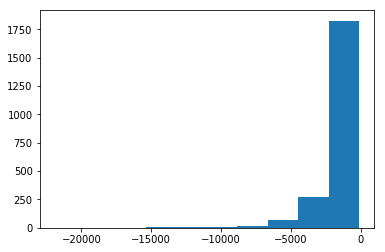

In [36]:
# Grafico distribución de los datos
hist, bin_edges = np.histogram(fbr['Brecha_rentas'], 10)
plt.hist(fbr['Brecha_rentas'], bins=bin_edges)
plt.show()

### Inconsistencias

* **ANSES: "NO"**
* **Con Nro. Beneficio**

In [37]:
# Imputo los missing con cero para poder filtrar
data['Nro. Beneficio']= data['Nro. Beneficio'].fillna(0)

# Filtro
filtro = data[(data['Anses'] == 'NO') & (data['Nro. Beneficio']!= 0)]
filtro.head()

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,...,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,edad_beneficiario,años_vigencia,% Beneficio1


In [38]:
# % de datos respecto al total

a= filtro['Nro. Póliza'].count()
b= data['Nro. Póliza'].count()

print ('Cantidad:', a, '\n' , '% del total:', a/b)

Cantidad: 0 
 % del total: 0.0


* **Tipo Beneficiario: Conyuge o Conviviente**
* **% Beneficio > 70%**

In [39]:
filtro1= data[(data['Tipo Beneficiario'] == 'C') & (data['% Beneficio']> 0.7)]
filtro1

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,...,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,edad_beneficiario,años_vigencia,% Beneficio1
0,20013901407,Castaño,Nicolas Antonio,100001,1997-06-01,ART,PF,"2,629.10","2,629.10","154,811.60",...,0.00,1,27040682932,C,1.00,F,1930-02-16,90.00,22.00,100.00%
1,20044290430,Petersen,Adolfo Felipe,100002,1997-12-01,ART,PF,"2,341.04","2,341.04","311,379.04",...,0.00,2,27055955803,C,0.71,F,1947-03-23,73.00,22.00,71.43%
5,20048183337,Loero,Hugo Ramon,100009,2000-08-01,ART,PF,"1,593.50","1,593.50","217,664.38",...,0.00,2,27057320724,C,0.71,F,1947-03-21,73.00,19.00,71.43%
6,20046292791,Canelas,Tomas Daniel,100010,2001-05-01,ART,PF,"1,091.32","1,091.32","141,773.97",...,0.00,1,27054458571,C,1.00,F,1946-10-28,73.00,18.00,100.00%
7,20242491417,Sandoval,Diego Ramon,100012,2001-09-01,ART,PF,792.36,792.36,"206,958.90",...,0.00,1,27258163481,C,1.00,F,1977-02-06,43.00,18.00,100.00%
8,20077035185,Odoardo,Carlos Alberto,100013,2002-03-01,ART,PF,"1,606.04","1,606.04","283,732.56",...,0.00,2,27114316380,C,0.71,F,1955-01-04,65.00,17.00,71.43%
463,23288132399,Martínez,Diego Sebastian,100469,2008-09-01,ART,PF,"2,591.45","2,591.45","508,336.27",...,0.00,2,27131201481,C,1.00,F,1956-11-10,63.00,11.00,100.00%
474,20319565133,Rolleri,Juan Manuel,100479,2008-09-01,ART,PF,"3,664.60","3,664.60","845,456.39",...,0.00,1,27173758230,C,1.00,F,1964-03-01,56.00,11.00,100.00%
808,20291532331,Alfonso,Javier,200169,2002-11-01,ART,PF,"3,038.67","1,571.58","563,747.17",...,0.00,1,27142616713,C,1.00,F,1960-11-24,59.00,17.00,100.00%
809,20261000440,Morales,Hugo Gaston,200170,2002-11-01,ART,PF,"5,118.05","2,684.96","463,182.72",...,0.00,1,27038801231,C,1.00,F,1940-04-20,80.00,17.00,100.00%


In [40]:
# % de datos respecto al total

a= filtro1['Nro. Póliza'].count()
b= data['Nro. Póliza'].count()

print ('Cantidad:', a, '\n' , '% del total:', a/b)

Cantidad: 50 
 % del total: 0.006576351440220966


* **Tipo Beneficiario: Conyuge**
* **% Beneficio < 50%**

In [41]:
filtro2= data_sdup[(data_sdup['Tipo Beneficiario'] == 'C') & (data_sdup['% Beneficio']< 0.5) & (data_sdup['Tipo de Renta'] == 'RVP')]
filtro2

,Nro. Póliza,Renta Liq.,Nro. Beneficiarios,Ciul Causante,Apellido,Nombres,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Gar.,...,Ajuste,Anses,Nro. Beneficio,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,Brecha_rentas,Reserva_años
325,100345,"1,132.97",2,20124015120,Maidana,Ernesto Horacio,2008-07-01,RVP,PF,988.86,...,TT,NO,NaN,27319047803,C,0.35,F,1972-11-05,144.11,20.00
326,100345,"1,778.06",1,20124015120,Maidana,Ernesto Horacio,2008-07-01,RVP,PF,988.86,...,TT,NO,NaN,27319047803,C,0.35,F,1972-11-05,789.20,13.00
329,100348,"1,182.41",2,20073524904,Mertian,Vicente,2008-07-01,RVP,PF,695.80,...,TT,SI,"15,588,969,701.00",27066312505,C,0.35,F,1942-02-14,486.61,8.00
330,100348,674.45,3,20073524904,Mertian,Vicente,2008-07-01,RVP,PF,695.80,...,TT,SI,"15,588,969,701.00",27066312505,C,0.35,F,1942-02-14,-21.35,15.00
1078,200438,540.10,1,20108687925,Peña,Ruben,2003-10-01,RVP,PF,515.80,...,TT,SI,"15,587,299,811.00",27148000323,C,0.35,F,1962-09-28,24.30,28.00
1079,200438,"1,797.95",1,20108687925,Peña,Ruben,2003-10-01,RVP,PF,515.80,...,TT,SI,"15,587,299,811.00",27148000323,C,0.35,F,1962-09-28,"1,282.15",8.00
1149,200492,"4,430.71",6,23170971159,Benitez,Ramon,2003-11-01,RVP,PF,990.67,...,TT,NO,NaN,23118854934,C,0.25,F,1955-10-10,"3,440.04",7.00
1150,200492,"1,785.92",5,23170971159,Benitez,Ramon,2003-11-01,RVP,PF,990.67,...,TT,NO,NaN,23118854934,C,0.25,F,1955-10-10,795.25,19.00
1151,200492,"3,463.67",1,23170971159,Benitez,Ramon,2003-11-01,RVP,PF,990.67,...,TT,NO,NaN,23118854934,C,0.25,F,1955-10-10,"2,473.00",10.00
1250,200597,823.67,1,20166691851,Araoz,Oscar Mario,2004-01-01,RVP,PF,"1,503.70",...,TT,NO,NaN,23166690684,C,0.35,F,1963-07-18,-680.03,62.00


In [42]:
data[data['Nro. Póliza'] == 1198000836]

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,...,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,edad_beneficiario,años_vigencia,% Beneficio1


In [43]:
filtro2.pivot_table('% Beneficio', ['Prestacion','Tipo de Renta'], aggfunc=('count'))

,,% Beneficio
Prestacion,Tipo de Renta,
I,RVP,2
PF,RVP,75


In [44]:
# % de datos respecto al total

a= filtro2['Nro. Póliza'].count()
b= data['Nro. Póliza'].count()

print ('Cantidad:', a, '\n' , '% del total:', a/b)

Cantidad: 77 
 % del total: 0.010127581217940287


* **Tipo Beneficiario: Hijo**
* **% Beneficio > 70%**

In [45]:
filtro3= data[(data['Tipo Beneficiario'] == 'H') & (data['% Beneficio']> 0.7)]
filtro3.head()

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,...,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,edad_beneficiario,años_vigencia,% Beneficio1
6969,20148461423,Manzo,Eduardo Daniel,206000,2009-06-01,ART,PF,"2,147.27","2,147.27","7,834.50",...,0.00,2,27382390631,H,1.00,F,1994-03-21,26.00,10.00,100.00%


In [46]:
# % de datos respecto al total

a= filtro3['Nro. Póliza'].count()
b= data['Nro. Póliza'].count()

print ('Cantidad:', a, '\n' , '% del total:', a/b)

Cantidad: 1 
 % del total: 0.00013152702880441932


* **Tipo Beneficiario: Hijo**
* **% Beneficio < 20%**

In [47]:
filtro4= data[(data['Tipo Beneficiario'] == 'H') & (data['% Beneficio']< 0.2)]
filtro4

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,...,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,edad_beneficiario,años_vigencia,% Beneficio1
214,20230208086,Castillo,Víctor Horacio,100241,2008-05-01,ART,PF,516.57,"2,841.13","639,054.53",...,0.00,5,27423725775,H,0.18,F,2000-01-17,20.00,11.00,18.18%
215,20230208086,Castillo,Víctor Horacio,100241,2008-05-01,ART,PF,516.57,"2,841.13","639,054.53",...,"15,535,457,833.00",5,27457282589,H,0.18,F,2006-01-23,14.00,11.00,18.18%
216,20230208086,Castillo,Víctor Horacio,100241,2008-05-01,ART,PF,516.57,"2,841.13","639,054.53",...,"15,535,457,834.00",5,27486647294,H,0.18,F,2008-01-27,12.00,11.00,18.18%
316,20237667558,Salto,Gabriel Hernán,100340,2008-07-01,RVP,PF,597.61,"3,286.86","688,608.19",...,0.00,4,20437812374,H,0.18,M,2001-12-04,18.00,11.00,18.18%
317,20237667558,Salto,Gabriel Hernán,100340,2008-07-01,RVP,PF,597.61,"3,286.86","688,608.19",...,0.00,4,27449630969,H,0.18,F,2003-08-19,16.00,11.00,18.18%
318,20237667558,Salto,Gabriel Hernán,100340,2008-07-01,RVP,PF,597.61,"3,286.86","688,608.19",...,0.00,4,20471618080,H,0.18,M,2006-02-06,14.00,11.00,18.18%
416,20221330286,Noguera,Luis Alberto,100428,2008-08-01,ART,PF,513.26,"2,822.93","613,127.36",...,0.00,7,27477585472,H,0.18,F,2007-05-03,13.00,11.00,18.18%
417,20221330286,Noguera,Luis Alberto,100428,2008-08-01,ART,PF,513.26,"2,822.93","613,127.36",...,0.00,7,27477585464,H,0.18,F,2007-05-03,13.00,11.00,18.18%
418,20221330286,Noguera,Luis Alberto,100428,2008-08-01,ART,PF,513.26,"2,822.93","613,127.36",...,0.00,7,27408851470,H,0.18,F,1997-11-27,22.00,11.00,18.18%
457,20242625022,López,Osvaldo Juan,100466,2008-09-01,ART,PF,377.45,"2,075.96","456,178.96",...,0.00,4,27399732587,H,0.18,F,1996-11-06,23.00,11.00,18.18%


In [48]:
data[data['Nro. Póliza'] == 6190227]

,Ciul Causante,Apellido,Nombres,Nro. Póliza,Inicio de Vigencia,Tipo de Renta,Prestacion,Renta Liq.,Renta Gar.,Reserva,...,Nro. Beneficio,Nro. Beneficiarios,Cuil Beneficiario,Tipo Beneficiario,% Beneficio,Sexo,Fecha de Nac.,edad_beneficiario,años_vigencia,% Beneficio1


In [49]:
# % de datos respecto al total

a= filtro4['Nro. Póliza'].count()
b= data['Nro. Póliza'].count()

print ('Cantidad:', a, '\n' , '% del total:', a/b)

Cantidad: 279 
 % del total: 0.03669604103643299


#### EXPORTO

In [50]:
mainpath = "C:/Users/eangenello/Desktop/TECNICA\RETIRO - Info Observaciones"
fullpath = mainpath + "/" + filename + ".xlsx"

In [52]:
with pd.ExcelWriter(fullpath) as writer:
    data.to_excel(writer, sheet_name='data', index=False)
    data_sdup.to_excel(writer, sheet_name='data_sdup', index=False)
    describe.to_excel(writer, sheet_name='describe')
    dist_ren_liq.to_excel(writer, sheet_name='dist_ren_liq')
    anses_ren_liq.to_excel(writer, sheet_name='anses_ren_liq')
    dist_ren_gar.to_excel(writer, sheet_name='dist_ren_gar')
    anses_ren_gar.to_excel(writer, sheet_name='anses_ren_gar')
    dist_porc_ben.to_excel(writer, sheet_name='dist_porc_ben')
    #ftr.to_excel(writer, sheet_name='menor_60', index=False)
    fbr.to_excel(writer, sheet_name='brecha_rent', index=False)
    trp.to_excel(writer, sheet_name='edad_minima', index=False)
    filtro.to_excel(writer, sheet_name='Ans NO', index=False)